# PharmSci 175/275 (UCI)
## What is this?? 
The material below is Lecture 2 (on Energy Minimization) from Drug Discovery Computing Techniques, PharmSci 175/275 at UC Irvine. 
Extensive materials for this course, as well as extensive background and related materials, are available on the course GitHub repository: [github.com/mobleylab/drug-computing](https://github.com/mobleylab/drug-computing)

This material is a set of slides intended for presentation with RISE as detailed [in the course materials on GitHub](https://github.com/MobleyLab/drug-computing/tree/master/uci-pharmsci/lectures/energy_minimization). While it may be useful without RISE, it will also likely appear somewhat less verbose than it would if it were intended for use in written form.

# Energy landscapes and energy minimization

Today: Energy landscapes, energy functions and energy mimimization

### Instructor: David L. Mobley

### Contributors to today's materials:
- David L. Mobley (UCI)
- David Wych (Mobley lab, UCI)
- [Previous contributions](https://engineering.ucsb.edu/~shell/che210d/) from M. Scott Shell (UCSB); some images used here are drawn from his materials.

## Energy landscapes provide a useful conceptual device

### Energy landscapes govern conformations and flexibility

### Chemistry takes place on energy landscapes
<div style="float: right">
    <img src="images/funnel.png" alt="GitHub" style="width: 400px;" align="right"/>
</div>

- Reactions and barriers
- Conformational change
- Binding/association


### Energy landscapes govern dynamics and thermodynamics
<div style="float: right">
    <img src="images/funnel.png" alt="GitHub" style="width: 400px;" align="right"/>
</div>
- Reaction rates
- Equilibrium properties

## Often, we are interested in exploring the energy landscape

A potential, $U(\bf{r^N})$ describes the energy as a function of the coordinates of the particles; here ${\bf r}$ is the coordinates, **boldface** denotes it is a vector, and the superscript denotes it is coordinates of all $N$ particles in the system.
<div style="float: right">
    <img src="images/funnel_labeled.png" alt="GitHub" style="width: 400px;" align="right"/>
</div>

### Landscapes have many features, including
- Global minimum, the most stable state (caveat: entropy)
- Local minima: other stable/metastable states

<div style="float: right">
    <img src="images/funnel_labeled.png" alt="GitHub" style="width: 1000px;" align="right"/>
</div>

### We can't visualize 3N dimensions, so we often project onto fewer dimensions

<div style="float: right">
    <img src="images/landscape_1D.png" alt="GitHub" style="width: 1000px;" align="right"/>
</div>

### Background: Vector notation

- For a single particle, we have coordinates $x$, $y$, and $z$, or $x_1$, $y_1$, and $z_1$ if it is particle 1
- We might write these as $(-1, 3, 2)$ for example, if $x=-1$, $y=3$, $z=2$. 
- For evem two particles, we have $x_1$ and $x_2$, $y_1$ and $y_2$, etc. 
- Writing out names of coordinates becomes slow, e.g. $f(x_1, y_1, z_1, x_2, y_2, z_2, ... z_N)$
- We simplify by writing $f({\bf r}^N)$ and remember that ${\bf r}^N$ really means:
\begin{equation}
{\bf r}^N=
\begin{bmatrix}
x_1 & y_1 & z_1 \\
x_2 & y_2 & z_2 \\
... & ... & ... \\
x_N & y_N & z_N \\
\end{bmatrix}
\end{equation}

### A concrete example
Imagine we have two particles with particle 1 having coordinates $x_1 = 1$, $y_1 = 3$, and $z_1 = 2$, and particle 2 having coordinates $x_2 = -1$, $y_2 = 3$, $z_2 = -1$. That would give us an array like this:
\begin{equation}
{\bf r}^N=
\begin{bmatrix}
1 & 3 & 2 \\
-1 & 3 & -1 \\
\end{bmatrix}
\end{equation}

### In Python, we'd store that as a numpy array

In [1]:
import numpy as np
r_N = np.array( [[1, 3, 2], [-1, 3, -1]], float)
print('y coordinate of first particle is %.2f' % r_N[0,1])

y coordinate of first particle is 3.00


We could compute the distance between particles as 
$d = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 + (z_1-z_2)^2}$

You could code that up directly in Python, or you can use array operations:

In [2]:
d = np.sqrt( ((r_N[0,:]-r_N[1,:])**2).sum() )
print(d)

3.60555127546


## Forces are properties of energy landscapes, too

The force is the slope (technically, gradient):

$f_{x,i} = -\frac{\partial U({\bf r^N})}{\partial x_i}$, $f_{y,i} = -\frac{\partial U({\bf r^N})}{\partial y_i}$, $f_{z,i} = -\frac{\partial U({\bf r^N})}{\partial z_i}$

As shorthand, this may be written ${\bf f}^N = -\frac{\partial U({\bf r^N})}{\partial {\bf r^N}}$ or ${\bf f}^N = -\nabla \cdot U({\bf r^N})$ where the result, ${\bf f}^N$, is an Nx3 array (matrix, if you prefer)

If energy function is pairwise additive, can evaluate via summing individual interactions -- force on atom k is 
\begin{equation}
{\bf f}_k = \sum_{j\neq k} \frac{ {\bf r}_{kj}}{r_{kj}}  \frac{\partial}{\partial r_{kj}} U(r_{kj})
\end{equation} where ${\bf r_{kj}} = {\bf r}_j - {\bf r_k}$. Note not all force calculations are necessary: ${\bf f}_{kj} = -{\bf f}_{jk}$

## The matrix of second derivatives is called the Hessian and distinguishes minima from saddle points



\begin{equation}
{\bf H}({\bf r}^N)=
\begin{bmatrix}
\frac{d^2 U({\bf r^N}) }{ d x_1^2} & \frac{d^2 U({\bf r^N}) }{ dx_1 d y_1} & ... & \frac{d^2 U({\bf r^N}) }{ dx_1 d z_1} \\
\frac{d^2 U({\bf r^N}) }{ d y_1 d x_1} & \frac{d^2 U({\bf r^N}) }{ d y_1^2} & ... & \frac{d^2 U({\bf r^N}) }{ dy_1 d z_N}\\
... & ... & ... & ... \\
\frac{d^2 U({\bf r^N}) }{ d z_N d x_1} & \frac{d^2 U({\bf r^N}) }{ d z_N d y_1} & ... & \frac{d^2 U({\bf r^N}) }{ dz_N^2}\\
\end{bmatrix}
\end{equation}

## Types of stationary points can be distiguished from derivatives

- Stationary points have zero force on each particle: $ \nabla \cdot U({\bf r^N}) = {\bf 0}$
- These can be minima or maxima
- Minima have negative curvature in all directions (restoring force is towards the minimum)


## Energy landscapes have *lots* of minima

(Update with example disconnectivity graph here if possible)

e.g. Doye, Miller, and Wales, J. Chem. Phys. 111: 8417 (1999)

- Disconnectivity graph shows minima for 13 LJ atoms
- To move between two minima, have to go to point where lines from two minima reach same energy
- 1467 distinct minima for 13 atoms!

## We care a lot about finding minima

- As noted, gives a first guess about most stable states
- Minima are stable structures, point of contact with experiment
- Initial structures need to be relaxed so forces are not too large
  - Remove strained bonds, atom overlaps
- Minimization is really optimization:
  - If you can find the minimum of $U$, you can find the minimum of $-U$
  - Same techniques apply to other things, i.e. finding set of parameters that minimizes an error, etc.

### Findining minima often becomes a numerical task, because analytical solutions become impractical very quickly

Consider $U(x,y) = x^2 + (y-1)^2$ for a single particle in a two dimensional potential. Finding $\nabla\cdot U = 0$ yields:

$2x = 0$ and $2(y-1)=0$ or $x=0$, $y=1$

simple enough

But in general, N dimensions means N coupled, potentially nonlinear equations. Consider 
\begin{equation}
U = x^2 z^2 +x (y-1)^2 + xyz + 14y + z^3
\end{equation}
Setting the derivatives to zero yields: 

$0 = 2xz^2 + (y-1)^2 +yz$

$0 = 2x(y-1) + xz + 14$

$0 = 2x^2z + xy + 3z^2$

**Volunteers??** It can be solved, but not fun.

**And this is just for a single particle in a 3D potential**, so we are typically forced to numerical minimizations, even when potential is analytic

### Energy minimization is a sub-class of the more general problem of finding roots

Common problem: For some $f(x)$, find values of $x$ for which $f(x)=0$

Many equations can be re-cast this way. *i.e.*, if you need to solve $g(x) = 3$, define $f(x) = g(x)-3$ and find $x$ such that $f(x)=0$

If $f(x)$ happens to be the force, this maps to energy minimization

As a consequence: Algorithms used for energy minimization typically have broader application to finding roots

### Let's check out a toy minimization problem to see how this would work
Here we'll set up a simple function to represent an energy landscape in 1D, and play with energy minimizing on that landscape. 

In [3]:
#Import pylab library we'll use
import scipy.optimize
#Get pylab ready for plotting in this notebook
%pylab inline 

#Define a range of x values to look at in your plot 
xlower = -5 #Start search at xlower
xupper = 5 #End search at xupper
#Define a starting guess for the location of the minimum
xstart = -0.01
#Create an array of x values for our plot, starting with xlower 
#and running to xupper with step size 0.01
xvals = np.arange( xlower, xupper, 0.01) 

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Define and the function f we want to minimize
def f(x):
    return 10*np.cos(x)+x**2-3.
#Store function values at those x values for our plot
fvals = f(xvals)

#Do our minimization ("line search" of sorts), store results to 'res'
res = scipy.optimize.minimize(f, xstart) # Apply canned minimization algorithm from scipy

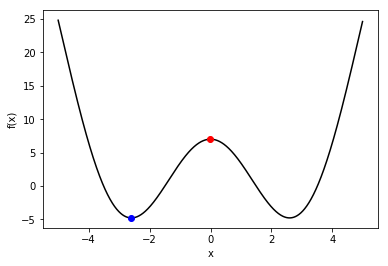

In [5]:
#Make a plot of our function over the specified range
plot(xvals, fvals, 'k-') #Use a black line to show the function
plot(res.x, f(res.x), 'bo') #Add the identified minimum to the plot as a blue circle
plot(xstart, f(xstart), 'ro') #Add starting point as red circle

#Add axis labels
xlabel('x')
ylabel('f(x)')

### Sandbox section

Try adjusting the above to explore what happens if you alter the starting conditions or the energy landscape or both. You might try:
- Change the starting point (`xstart`) so it is slightly to the left or slightly to the right
- Change the starting point so it is far up the wall to the left or the right
- Change the energy landscape to alter its shape, perhaps adding a term proportional to `+x`. Can you make it so one of the wells is a local minimum, perhaps by altering the coefficient of this term? 
- If you adjust the starting point further, can you make the blue ball get stuck in a local minimum? Can you make it so it still finds the global minimum? 

## Steepest descents is a simple minimization algorithm that always steps as far as possible along the direction of the force
Take ${\bf f}^N = -\frac{\partial U({\bf r}^N)}{\partial {\bf r}^N}$, then:
1. Move in direction of last force until the minimum *in that direction* is found
2. Compute new ${\bf f}_i^N $ for iteration $i$, perpendicular to previous force

<div style="float: right">
    <img src="images/steepest_descent.svg" alt="GitHub" style="width: 300px;" align="right"/>
</div>
Repeat until minimum is found

**Limitations**: 

Oscillates in narrow valleys; slow near minimum.

<div style="float: right">
    <img src="images/steepest_descent.svg" alt="GitHub" style="width: 700px;" align="right"/>
</div>

### Steepest descents oscillates in narrow valleys and is slow near the minimum
<div style="float: center">
    <img src="images/Banana-SteepDesc.gif" style="width: 600px;" align="center"/>
</div>

(Illustration, P.A. Simonescu, [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent#/media/File:Banana-SteepDesc.gif), [CC-BY-SA](https://creativecommons.org/licenses/by-sa/3.0/))

### Another illustration further highlights this

(In this case, steepest *ascents*, but it's just the negative...)
<div style="float: left">
    <img src="images/gradient_ascent_contour.png" style="width: 400px;" align="left"/>
</div>
<div style="float: right">
    <img src="images/gradient_ascent_surface.png" style="width: 500px;" align="right"/>
</div>


(Images public domain: [source](https://upload.wikimedia.org/wikipedia/commons/d/db/Gradient_ascent_%28contour%29.png), [source](https://upload.wikimedia.org/wikipedia/commons/6/68/Gradient_ascent_%28surface%29.png))

## A line search can make many minimization methods more efficient

A line search is an efficient way to find a minimum along a particular direction
- Line search: Bracket minimum
  - Start with initial set of coordinates ${\bf r}$ and search direction ${\bf v}$ that is downhill
  - Generate pairs of points a distance $d$ and $2d$ along the line (${\bf r} + d{\bf v}, {\bf r}+2d{\bf v}$)
     1. If the energy at the further point is higher than the energy at the nearer point, stop
     2. Otherwise, move the pair of points $d$ further along the line and go back to 1.

### To finish a line search, identify the minimum precisely

- Fit a quadratic to our 3 points (initial, and two bracket points)
- Guess that minimum is at the zero of the quadratic, call this point 4.
- Fit a new quadratic using points 2, 3, and 4, and move to the zero.
- Repeat until the energy stops changing within a given tolerance

## To do better than steepest descents, let's consider its pros and cons

<div style="float: right">
    <img src="images/gradient_ascent_contour.png" style="width: 550px;" align="right"/>
</div>

- Good to go in steepest direction initially 
- It’s a good idea to move downhill
- It is initially very fast (see Leach Table 5.1)
- But steepest descent overcorrects 


## SciPy does't implement steepest descents because of these issues
SciPy has lots of functions and tools for [optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html), but it doesn't even implement steepest descents because of poor reliability.
However, the `Nelder-Mead` minimization method applies a downhill simplex method which also is less than ideal, so let's play around with that a bit. First, let's make a suitable landscape:

In [6]:
#Define and the function f we want to minimize
def f(arr):
    return 10*np.cos(arr[0])+arr[0]**2-3.+arr[1]**2

#Define a range of x, y values to look at in your plot 
# NOTE IF YOU WANT TO ADJUST THESE YOU NEED TO RE-RUN ALL THREE CELLS (shift-enter)
xlower, ylower = -5, -5 #Start search at xlower and yupper
xupper, yupper = 5, 5 #End search at xupper and yupper
#Define a starting guess for the location of the minimum
xstart, ystart = -1.0, 1.0
#Create an array of coordinates for our plot
xvals = np.arange( xlower, xupper, 0.01) 
yvals = np.arange( ylower, yupper, 0.01)

# Make a grid of x and y values
xx, yy = np.meshgrid(xvals, yvals)

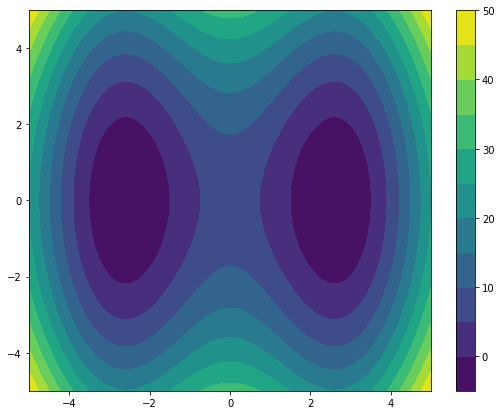

In [7]:
#Store function values at those x and y values for our plot
fvals = f(np.array([xx,yy]))

colors = np.linspace(0,1,len(xx))
#Create 9''x7'' figure
plt.figure(figsize=(9, 7))
#Plot the Energy Landscape with a colorbar to the side
plt.contourf(xvals, yvals, fvals, 10)
plt.colorbar()
plt.show()

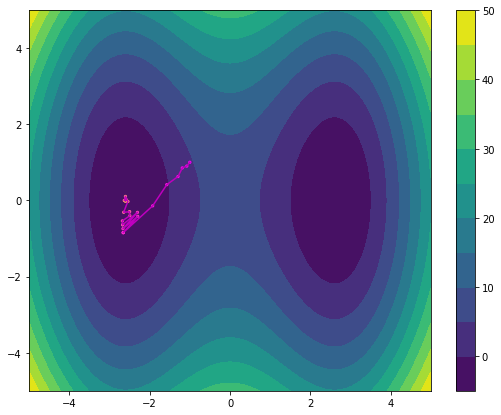

In [8]:
res = scipy.optimize.minimize(f, np.array((xstart,ystart)), method='Nelder-Mead', options={'return_all':True})

plt.figure(figsize=(9, 7))
plt.contourf(xvals, yvals, fvals, 10)
plt.colorbar()

# Plot path of minimization
xvals = [ entry[0] for entry in res.allvecs ]
yvals = [ entry[1] for entry in res.allvecs ]

colors = np.linspace(0,1,len(xvals))
plt.scatter(xvals, yvals, c=colors, cmap='spring', s=5, marker = "o")
plt.plot(xvals, yvals, 'm-')

## Conjugate gradient (CG) works like steepest descent but chooses a different direction

- Start with an initial direction ${\bf v}$ that is downhill, move in that direction until a minimum is reached.

- Compute a new direction using ${\bf v}_i = {\bf f}^N_i + \gamma_i {\bf v}_{i-1}^N$ where $\gamma_i = \frac{({\bf f}^N_i-{\bf f}^N_{i-1}){\bf f}^N_i}{{\bf f}^N_i {\bf f}^N_i}$; note $\gamma_i$ is a scalar.

Note that by ${\bf f}^N {\bf f}^N$ we mean vector multiplication, not a matrix multiplication; that is:
\begin{equation}
{\bf f}^N {\bf f}^N = f^2_{x,1} + f^2_{y,1} + f^2_{z,1} + f^2_{x,2} + ... + f^2_{z, N}
\end{equation}

(In Python, this can be coded by multiplying ${\bf f}\times {\bf f}$, where ${\bf f}$ are arrays, and taking the sum of the result; for normal matrix multiplication of arrays one would use a dot product)

$\gamma_i$ is designed so that the new direction is *conjugate* to the old direction so that the new step does not undo any of the work done by the old step (causing oscillation)

### Conjugate gradient (CG) is more efficient

<div style="float: right">
    <img src="images/conjugate_gradient_illustration.svg" style="width: 300px;" align="right"/>
</div>
- Green: Steepest descent (with optimal step size)
- Red: Conjugate gradient

Ideally takes at most $M$ steps, where $M$ is the number of degrees of freedom, often $3N$, though in practice even small precision errors make it take longer than this.


(Image: [Wikipedia](https://en.wikipedia.org/wiki/Conjugate_gradient_method#/media/File:Conjugate_gradient_illustration.svg), public domain. Oleg Alexandrov.) 

## Let's look at a CG example

In [9]:
#Define and the function f we want to minimize
def f(arr):
    return 10*np.cos(arr[0])+arr[0]**2-3.+arr[1]**2

#Define a range of x, y values to look at in your plot 
# NOTE IF YOU WANT TO ADJUST THESE YOU NEED TO RE-RUN ALL THREE CELLS (shift-enter)
xlower, ylower = -5, -5 #Start search at xlower and yupper
xupper, yupper = 5, 5 #End search at xupper and yupper
#Define a starting guess for the location of the minimum
xstart, ystart = -1.0, 1.0
#Create an array of coordinates for our plot
xvals = np.arange( xlower, xupper, 0.01) 
yvals = np.arange( ylower, yupper, 0.01)

# Make a grid of x and y values
xx, yy = np.meshgrid(xvals, yvals)

#Store function values at those x and y values for our plot
fvals = f(np.array([xx,yy]))

colors = np.linspace(0,1,len(xx))

In [10]:
res = scipy.optimize.minimize(f, np.array((xstart,ystart)), method='CG', options={'return_all':True})

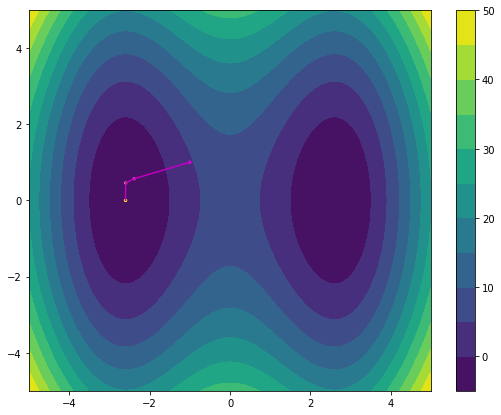

In [11]:
plt.figure(figsize=(9, 7))
plt.contourf(xvals, yvals, fvals, 10)
plt.colorbar()

# Plot path of minimization
xvals = [ entry[0] for entry in res.allvecs ]
yvals = [ entry[1] for entry in res.allvecs ]

colors = np.linspace(0,1,len(xvals))
plt.scatter(xvals, yvals, c=colors, cmap='spring', s=5, marker = "o")
plt.plot(xvals, yvals, 'm-')

## More advanced minimization methods can have considerable advantages

- Newton-Raphson: Based on Taylor expansion of potential around zero
  - reaches minimum in one step for quadratic potentials
  - converges to minima and saddle points, so requires initial moves to reach minima
  - slow because requires Hessian at every step
- Quasi-Newton methods approximate the Hessian to go faster
  - L-BFGS is a popular quasi-Newton method

In [12]:
#Define and the function f we want to minimize
def f(arr):
    return 10*np.cos(arr[0])+arr[0]**2-3.+arr[1]**2

#Define a range of x, y values to look at in your plot 
xlower, ylower = -5, -5 #Start search at xlower and yupper
xupper, yupper = 5, 5 #End search at xupper and yupper
#Define a starting guess for the location of the minimum
xstart, ystart = -0.1, 1.0
#Create an array of coordinates for our plot
xvals = np.arange( xlower, xupper, 0.01) 
yvals = np.arange( ylower, yupper, 0.01)

xx, yy = np.meshgrid(xvals, yvals)

#Store function values at those x and y values for our plot
fvals = f(np.array([xx,yy]))

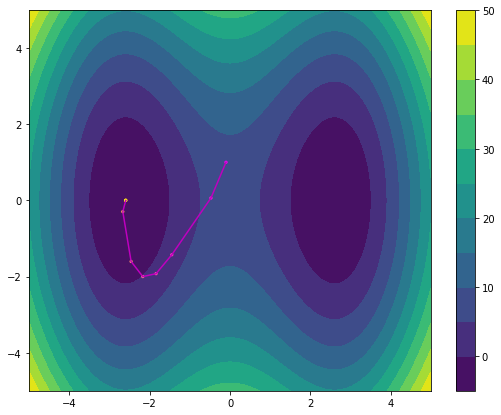

In [13]:
res = scipy.optimize.minimize(f, np.array((xstart,ystart)), method='BFGS', options={'return_all':True})

plt.figure(figsize=(9, 7))
plt.contourf(xvals, yvals, fvals, 10)
plt.colorbar()

xvals = [ entry[0] for entry in res.allvecs ]
yvals = [ entry[1] for entry in res.allvecs ]

colors = np.linspace(0,1,len(xvals))
plt.scatter(xvals, yvals, c=colors, cmap='spring', s=5, marker = "o")
plt.plot(xvals, yvals, 'm-')

## Locating global minima is challenging and often involves combination of techniques

- Need some way to cross barriers, in addition to minimization
- Often combine techniques
  - i.e. Molecular Dynamics or Monte Carlo + minimization
- Normal mode analysis can be used to identify collective motions
  - Once identified, system can be moved in those directions

### When the number of dimensions is small, global minima can be found by repeated trials

One can simply do lots of minimizations from random starting points and find the global minimum sometimes, if there are not too many minima in total. See e.g. this [local and global minima](http://people.duke.edu/~ccc14/sta-663-2016/13_Optimization.html#Local-and-global-minima) discussion. 

As an exercise, you might try to find the global minimum of this function by picking random starting points and minimizing many times (for solutions, see that link):

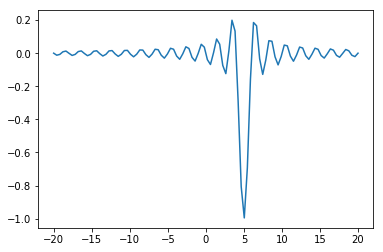

In [14]:
def f(x, offset):
    return -np.sinc(x-offset)
x = np.linspace(-20, 20, 100)
plt.plot(x, f(x, 5));